In [1]:
from typing import TypedDict, List
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END, START
from dotenv import load_dotenv

In [2]:
load_dotenv()

class AgentState(TypedDict):
    message: List[HumanMessage]

llm =  ChatGoogleGenerativeAI(model='gemini-2.5-flash-preview-05-20')


In [3]:
def process_node(state:AgentState) -> AgentState:
    """ Get an LLM message"""

    result = llm.invoke(state['message'])
    print(result.content)
    return result

graph = StateGraph(AgentState)
PROCESS="Process"
graph.add_node(PROCESS, process_node)
graph.add_edge(START, PROCESS)
graph.add_edge(PROCESS, END)

app = graph.compile()


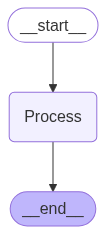

In [4]:
app

In [5]:
user_input =input("Enter: ")
context= AgentState(message=[HumanMessage(content=user_input)])
result = app.invoke(context)

Enter:  write a simple poem


A tiny star, a moon so bright,
Shines in the sky, through the night.
A gentle breeze, a leafy tree,
Simple wonders, for you and me.
